# Control 1: Descripción y Análisis Exploratorio de Datos

Jerónimo Aranda 150344  
Emiliano Zambrano 157043  
Jorge Rotter  158391 



In [12]:
import io
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)

## Lectura, limpieza y profiling

In [7]:
df = pd.read_csv("lista01.dat", sep="\s+", usecols=['ocupacion', 'educacion','ingreso','mujeres','prestigio','censo','tipo'])
df.head()

,ocupacion,educacion,ingreso,mujeres,prestigio,censo,tipo
0,GOV.ADMINISTRATORS,13.11,12351,11.16,68.8,1113,prof
1,GENERAL.MANAGERS,12.26,25879,4.02,69.1,1130,prof
2,ACCOUNTANTS,12.77,9271,15.70,63.4,1171,prof
3,PURCHASING.OFFICERS,11.42,8865,9.11,56.8,1175,prof
4,CHEMISTS,14.62,8403,11.68,73.5,2111,prof


In [97]:
df.groupby('censo').size().to_frame('n').sort_values('n', ascending=False).head()

,n
censo,
8215,2
1113,1
6191,1
8311,1
8278,1


In [98]:
df[df.censo==8215]

,ocupacion,educacion,ingreso,mujeres,prestigio,censo,tipo,tipo_numeric
70,SLAUGHTERERS.1,7.64,5134,17.26,25.2,8215,bc,0.0
71,SLAUGHTERERS.2,7.64,5134,17.26,34.8,8215,bc,0.0


`censo` no es la llave porque separan *slaughterers* en dos (sólo cambia el prestigio).

In [100]:
df.groupby('ocupacion').size().to_frame('n').sort_values('n', ascending=False).head()

,n
ocupacion,
ACCOUNTANTS,1
PLUMBERS,1
RECEPTIONSTS,1
REAL.ESTATE.SALESMEN,1
RAILWAY.SECTIONMEN,1


`ocupación` sí es la llave primaria.

## Clasificación de variables:

+ `ocupacion`: la llave única de la tabla.
+ `educacion`: continua (mayor a 0)
+ `ingreso`: continua (mayor a 0)
+ `mujeres`: continua 
+ `prestigio`: continua
+ `censo`: categórica sin orden (casi biyecta con la llave única)
+ `tipo`: categórica sin orden

## Exploratorio

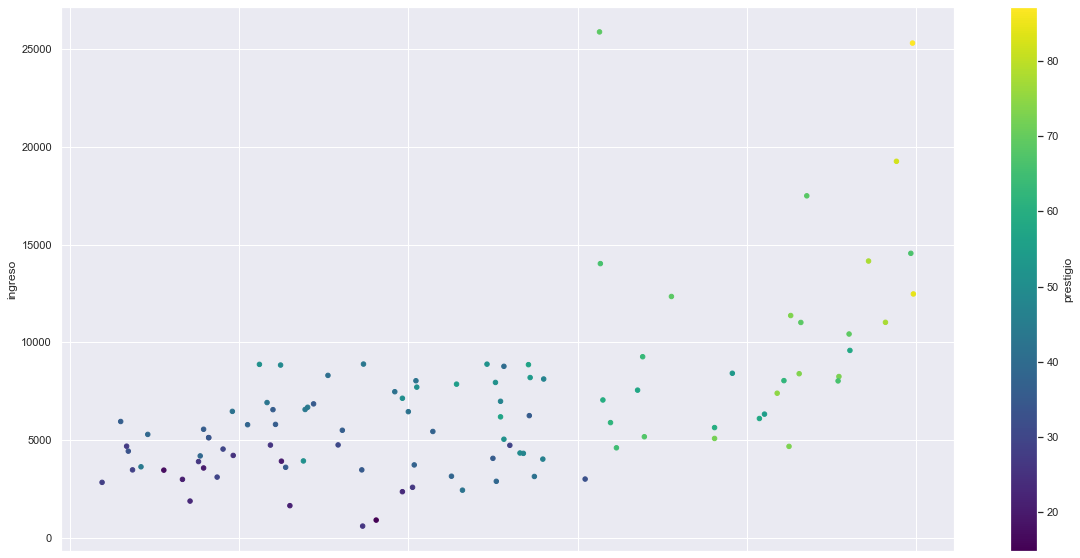

In [110]:
df.plot.scatter(x='educacion',y='ingreso',c='prestigio', colormap='viridis')

Para empezar, el ingreso es creciente con respecto a la educación. Asimismo, mientras el nivel de educación crece, las ocupaciones se consideran más prestigiosas. Luego, el prestigio crece mientras el nivel de ingreso es mayor. También, los datos muestran que las ocupaciones con alto nivel de ingreso, educación y prestigio son escasas. 

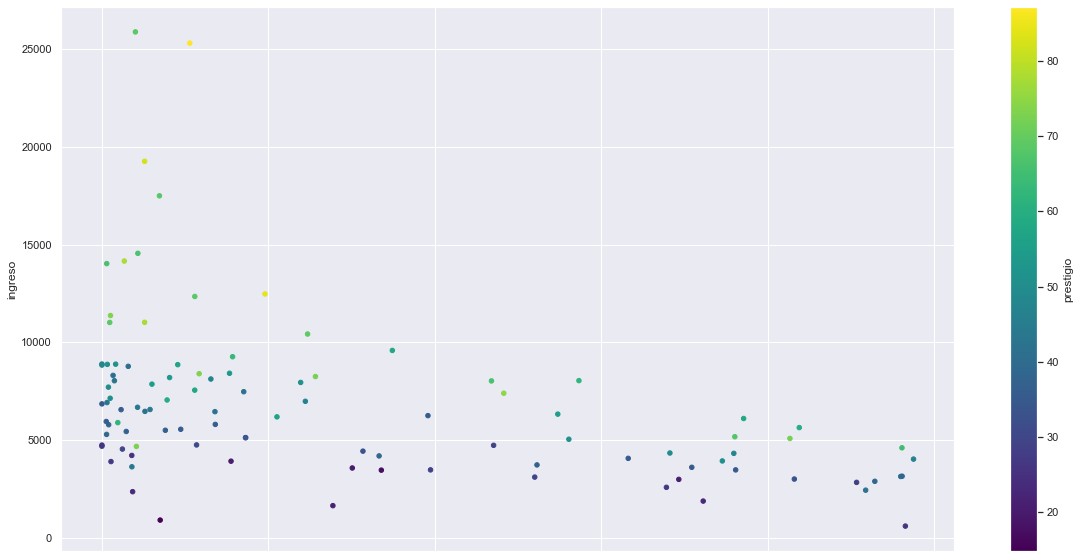

In [15]:
df.plot.scatter(x='mujeres',y='ingreso',c='prestigio',colormap='viridis')

El ingreso tiene una ligera tendencia decreciente a medida que el porcentaje de mujeres en la ocupación crece. Los datos no muestran una relación marcada entre el porcentaje de mujeres y el prestigio. Sin embargo, se observa que la cantidad de ocupaciones con alto nivel de prestigio es decreciente con respecto a la mujeres en la ocupación; es decir, a mayor porcentaje de mujeres se observa una caída en la cantidad de ocupaciones con prestigio mayor a 50. También, vale la pena destacar la acumulación de ocupaciones con un bajo porcentaje de mujeres, en particular aquellas con ingreso mayor a 5000 y prestigio mayor a 60.

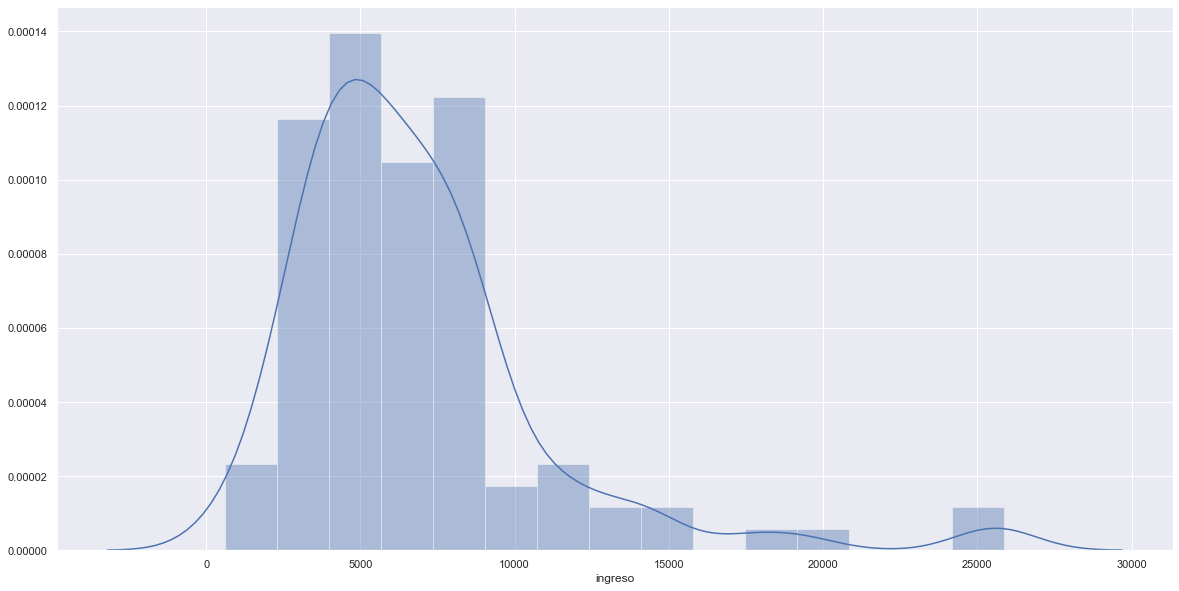

In [19]:
sns.distplot(df.ingreso)

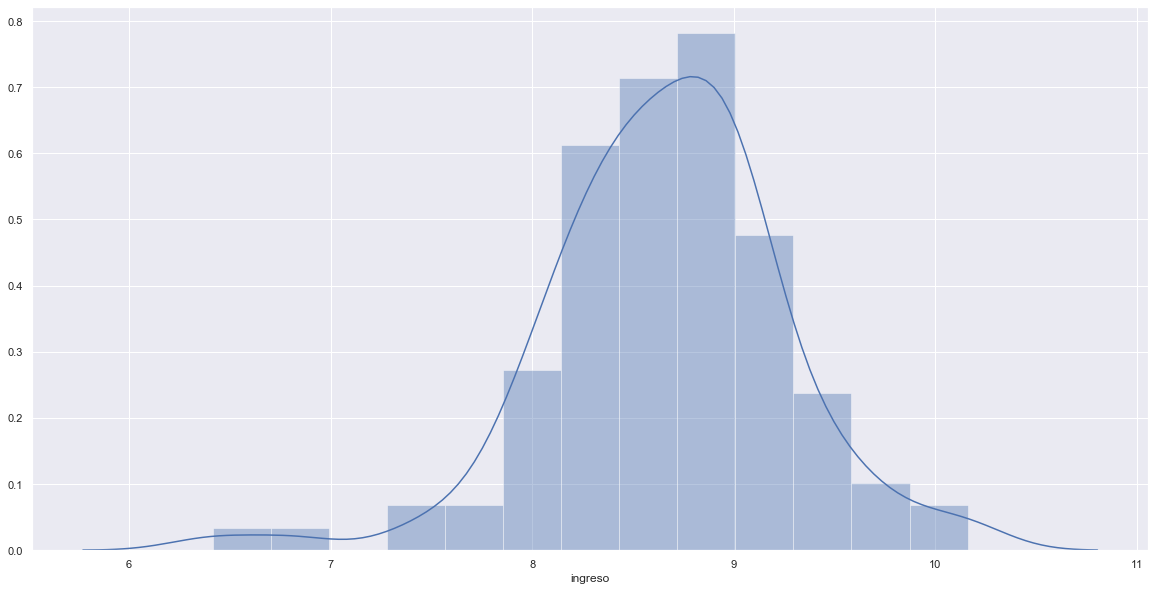

In [21]:
sns.distplot(np.log(df.ingreso))

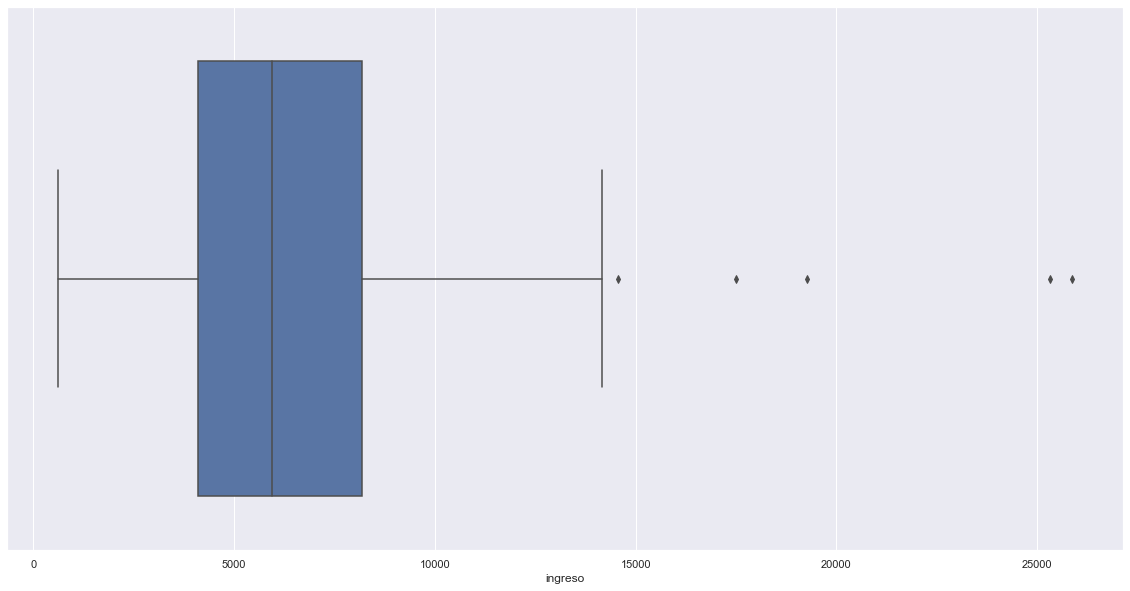

In [20]:
sns.boxplot(df.ingreso)

La mitad de las ocupaciones generan un ingreso de 6000 o menos, mientras que 5 ocupaciones generan 15000 o más. Las dos ocupaciones con mayor ingreso generan por lo menos 4.5 veces más que la mitad de todas las ocupaciones. Asimismo, el 75% de los trabajos generan a los más una tercera parte de lo que ingresan los dos mejor remunerados.

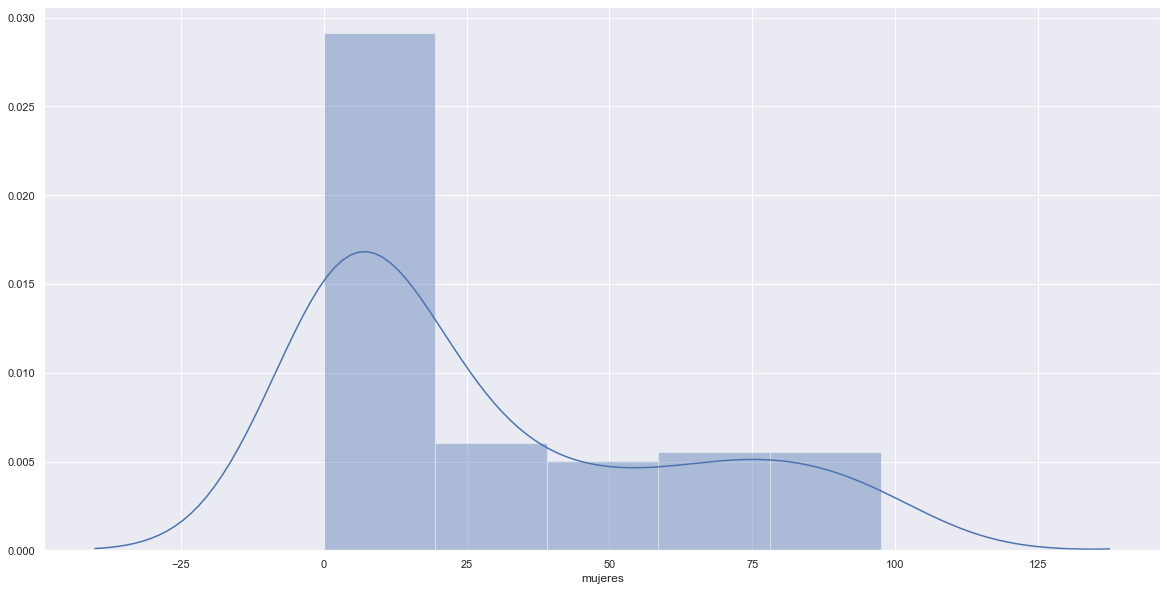

In [27]:
sns.distplot(df.mujeres)

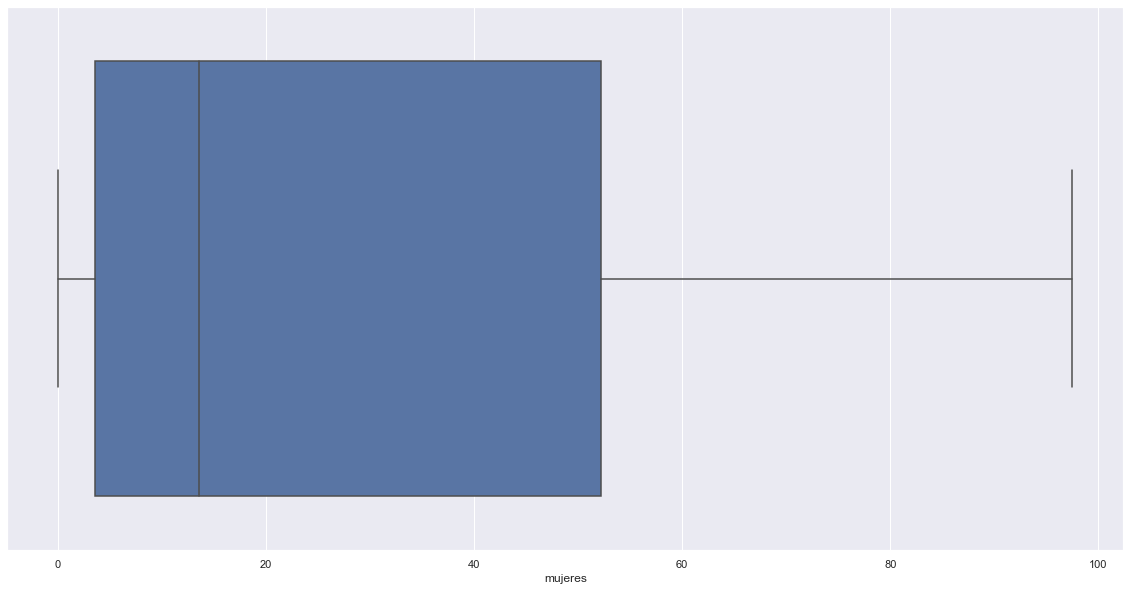

In [28]:
sns.boxplot(df.mujeres)

El anterior gráfico es muy revelador en la categoría de mujeres. Al ser una variable que mide el porcentaje de mujeres por ocupación, se puede observar que el 50% de las ocupaciones incorporan menos de 2 mujeres por cada 10 empleados. Luego, alrededor del 75% de los empleados tienen 5  o menos mujeres cada 10 trabajadores.

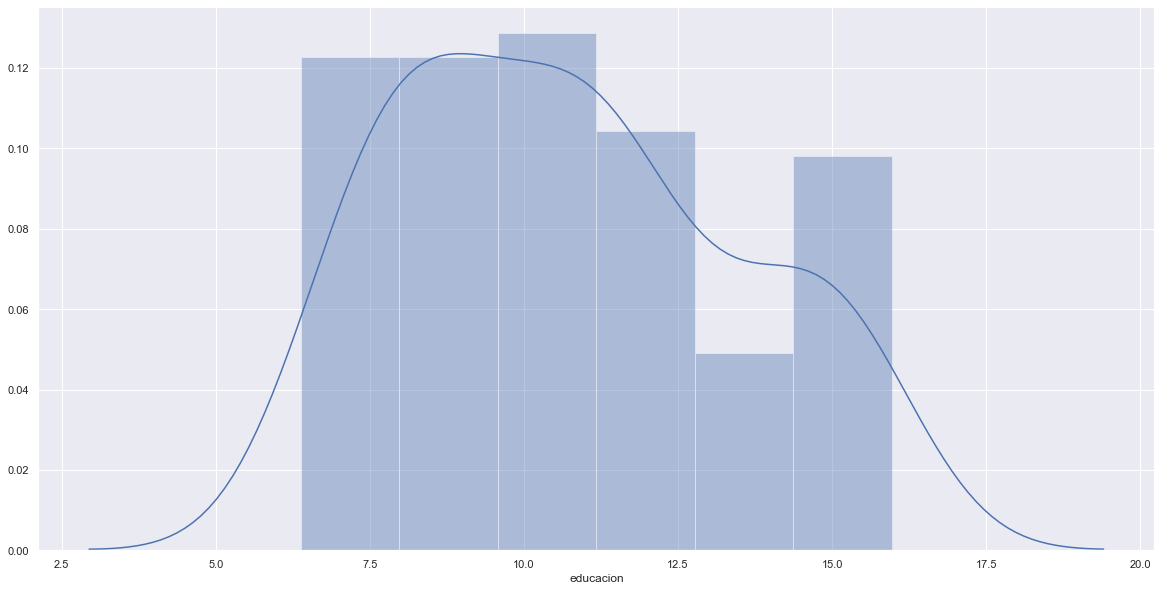

In [45]:
sns.distplot(df.educacion)

La educación es bimodal: gran parte de la muestra tiene una educación más o menos uniforme entre 6 y 11 y un grupo (poco más pequeño) de personas muy educadas.

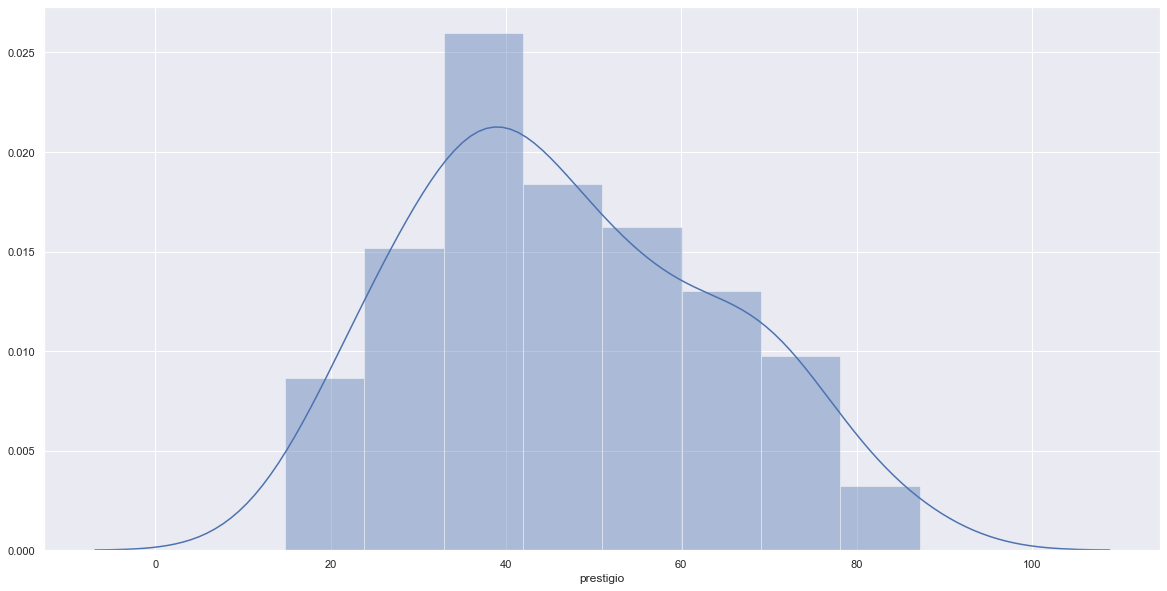

In [34]:
sns.distplot(df.prestigio)

El prestigio de las distintas profesiones tiene sesgo a la derecha y tienen una única moda cerca el 40.

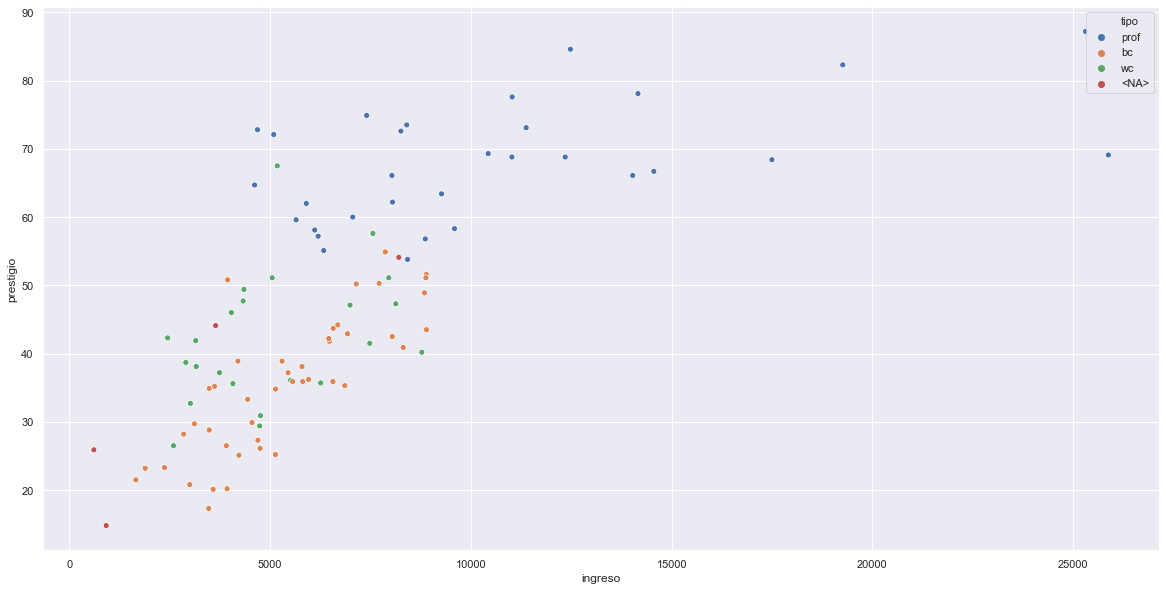

In [88]:
sns.scatterplot(x='ingreso', y='prestigio', hue='tipo', data=df)

En general, las profesiones *blue collar* están en el sector de bajo ingreso y bajo prestigio. Las de profesionista están en rangos más altos de ambas variables.

In [116]:
tipo_to_numeric={'prof':2,'bc':0,'wc':1}
df['tipo_numeric']=df['tipo'].map(tipo_to_numeric)

In [117]:
df['tipo_numeric'] = df.tipo_numeric+np.random.rand(df.shape[0])/10

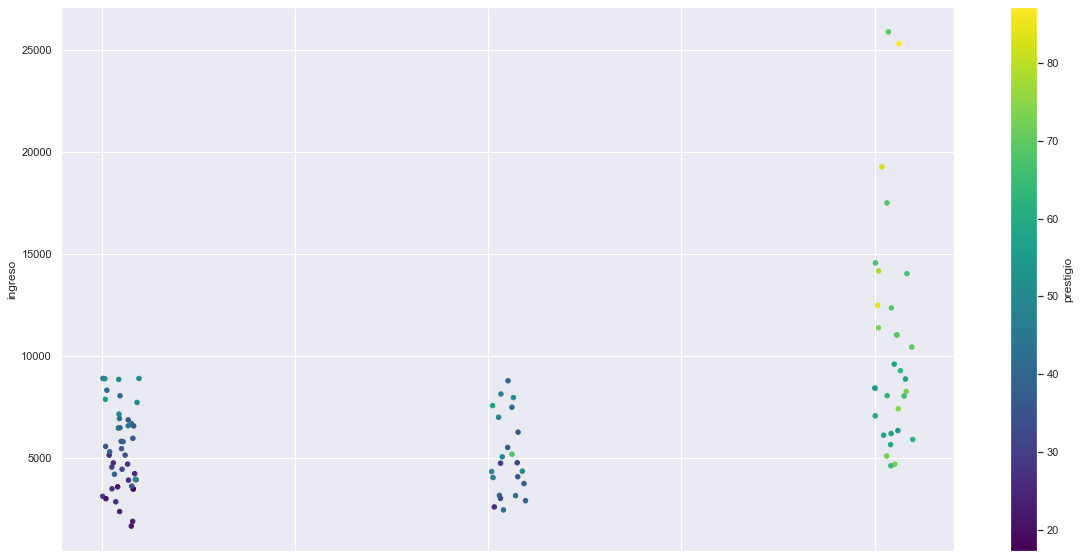

In [118]:
df.plot.scatter(x='tipo_numeric',y='ingreso',
                c='prestigio',colormap='viridis')

Los tres distintos tipos de ocupación son: 0 correspondiente al trabajo obrero, 1 correspondiente al oficinista, y 2 al profesional, gerencial o técnico. Es claro que el trabajo de tipo 2 tiene más prestigio que los otros dos. Asimismo, este tipo de trabajo es el único de los tres con ocupaciones que ganen más de 10000. De igual forma, las ocupaciones en esta categoría son mejor remuneradas que las otras dos en un cantidad considerable de casos. Por otra parte, el ingreso percibido por las ocupaciones de tipo obrera y oficinista es prácticamente el mismo. No obstante, el prestigio de los trabajos oficinistas es ligeramente superior.